# Problem Description:
A Human Resource company needs to determine the salary for a new job position being created. They only have access to a salary dataset for the company, which includes salary information for the top 10 positions along with their corresponding levels. The task is to assist HR in deciding the appropriate salary if the new position falls between levels 7 and 8.

Data Set: **Position_Salaries.csv**
Rules: You are restricted from utilizing the sklearn library.You are limited to using only the libraries provided.

Reference : https://www.javatpoint.com/machine-learning-polynomial-regression

 https://www.kaggle.com/code/omkarsantoshraut/polynomial-regression

In [2]:
# Allowded to use only these libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploratory data analysis

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000
          Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


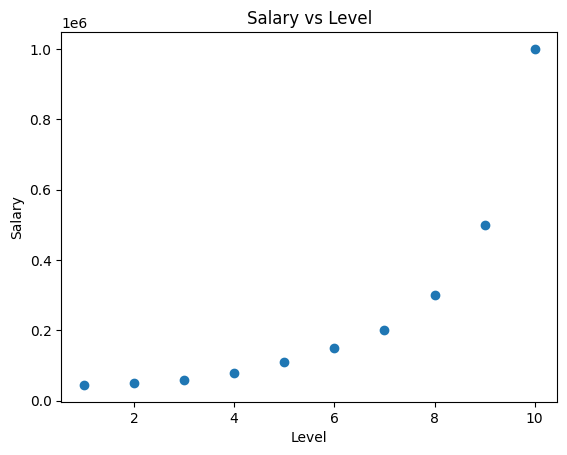

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")

# Check the first few rows of the dataset
print(dataset.head())

# Get some basic statistics
print(dataset.describe())

# Visualize the data
plt.scatter(dataset['Level'], dataset['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Salary vs Level')
plt.show()

### Based on the exploratory data analysis, answer the following


* Can you use a simple linear regression model to fit this data (Yes/No)?
> * No, a simple linear regression model may not fit this data well because the relationship between level and salary appears to be nonlinear.

* If you use a simple linear model to fit this data, will it fit well (Yes/No)?
> *  No

* Explain why you said yes or no to the above questions.
> * it won't fit well for the same reason as above.



## Polynomial Regression

**Construct a second order Model:** $$\;\;\;\;
\hat y = w_1 x_1^2 + w_2x_1 + b
$$

**Construct a Cost function:**
$$MSE(w_1,w_2,b)= your\;answer$$

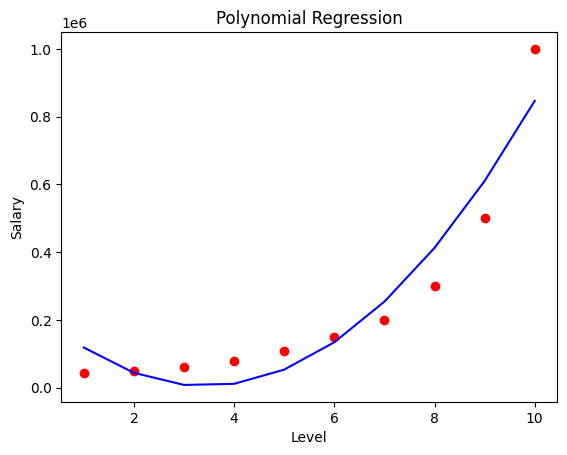

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Extracting features and target variable
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Fitting Polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)

# Fitting the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Visualizing the Polynomial Regression results
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### By analysing the cost function, answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Yes, mean squared error (MSE) can be used as the cost function.


* Explain why you said yes or no to the above questions.
> * MSE is a suitable cost function for regression problems because it measures the average squared difference between the estimated values and the actual values.

**Derivatives of cost function:**
$$Your \; answer$$
Derivatives of cost function:*
$$ \frac{\partial MSE}{\partial w} = \frac{2}{N} \sum_{i=1}^N \left( wx_i^2 + bx_i - y_i x_i \right) $$

$$ \frac{\partial MSE}{\partial b} = \frac{2}{N} \sum_{i=1}^N \left( wx_i + b - y_i \right) $$



**Gradient Descent Algorithm:**
```
Repeat until converges:
$$w = w -\alpha \frac{d}{dw}MSE(w,b) $$
$$b = b -\alpha \frac{d}{dw}MSE(w,b) $$
```
$$your\;answer$$

## Implementation of the model

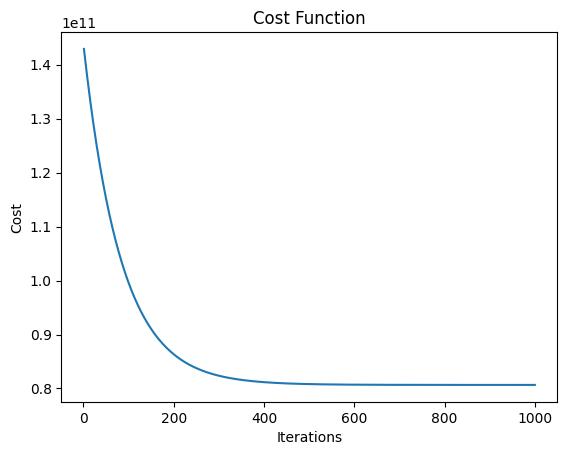

In [5]:
def gradient_descent(X, y, epochs, learning_rate):
    n = len(y)
    w1 = 0
    w2 = 0
    b = 0
    cost_history = []

    for epoch in range(epochs):
        # Predictions
        y_pred = w1 * X[:,0] ** 2 + w2 * X[:,0] + b

        # Error
        error = y_pred - y

        # Calculating gradients
        w1_gradient = (2/n) * np.dot(X[:,0] ** 2, error)
        w2_gradient = (2/n) * np.dot(X[:,0], error)
        b_gradient = (2/n) * np.sum(error)

        # Update parameters
        w1 -= learning_rate * w1_gradient
        w2 -= learning_rate * w2_gradient
        b -= learning_rate * b_gradient

        # Calculate cost
        cost = np.mean((error)**2)
        cost_history.append(cost)

    return w1, w2, b, cost_history

# Define parameters
epochs = 1000
learning_rate = 0.001

# Perform gradient descent
w1, w2, b, cost_history = gradient_descent(X_poly, y, epochs, learning_rate)

# Plot the cost function
plt.plot(range(1, epochs + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.show()

### Answer the following

* What is learning rate?
> * Learning rate is a hyperparameter that determines the step size at each iteration

* What will happen if the learning rate is too large?
> * If the learning rate is too large, the algorithm may overshoot the minimum of the cost function and fail to converge.

* What will happen if the learning rate is too small?
> * If the learning rate is too small, the algorithm may take a long time to converge to the minimum of the cost function, or it may get stuck in a local minimum.


* If you what to change the second order (quadratic) model to third order model what all things will change in the above code?
> * Change the degree parameter in PolynomialFeatures to 3.
*Update the formula for y_pred in the gradient_descent function to include the third-order term.
*Update the derivatives of the cost function accordingly.